 1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy
 on the test set. Hint: the KNeighborsClassifier works quite well for this task;
 you just need to find good hyperparameter values (try a grid search on the
 weights and n_neighbors hyperparameters).

In [1]:
%pip install tensorflow numpy pandas matplotlib seaborn scikit-learn scikit-learn-intelex

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')) > 0)
print(tf.config.list_physical_devices('GPU'))

False
[]


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [14]:
mnist = tf.keras.datasets.mnist
mnist_set= mnist.load_data() 
(x_train, y_train), (x_val, y_val) = mnist_set

KNeighborsClassifier

In [16]:
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32') / 255
x_val = x_val.reshape((x_val.shape[0], 28*28)).astype('float32') / 255


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

KN= KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
KN.fit(x_train, y_train)
y_pred = KN.predict(x_val)
print(accuracy_score(y_val, y_pred))

0.9705


tf.Tensor(
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13    1    7    3    3]
 [   1    6    0    0  950    0    4    2    0   19]
 [   6    1    0   11    2  859    5    1    3    4]
 [   5    3    0    0    3    3  944    0    0    0]
 [   0   21    5    0    1    0    0  991    0   10]
 [   8    2    4   16    8   11    3    4  914    4]
 [   4    5    2    8    9    2    1    8    2  968]], shape=(10, 10), dtype=int32)


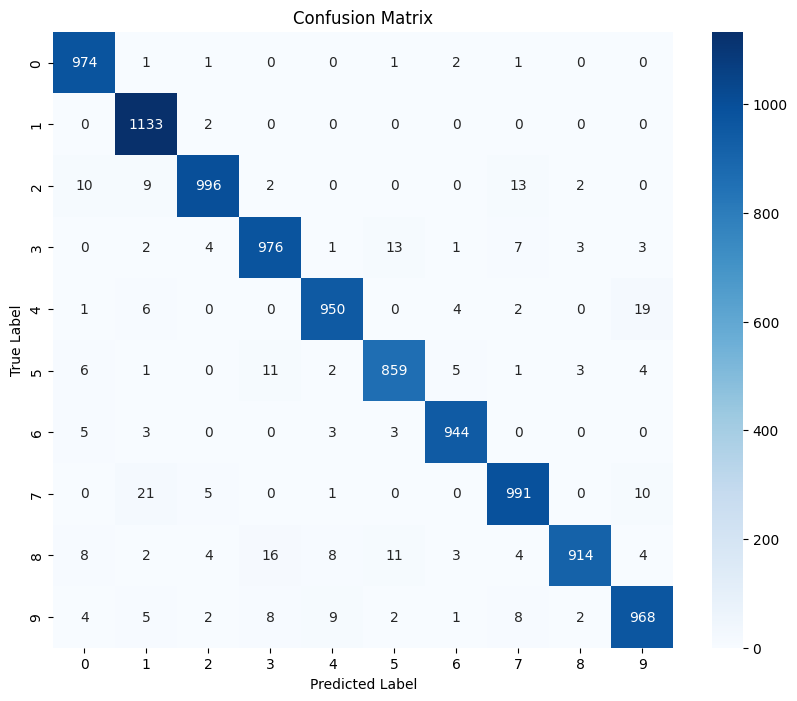

In [22]:
confusion_matrix = tf.math.confusion_matrix(y_val, y_pred)
print(confusion_matrix)

#plot inn graph
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Precision and Recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9706882342922246
Recall: 0.9705
F1 Score: 0.9704523390961245


In [24]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(KN, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
# Best model evaluation
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(x_val)
print("Best model accuracy: ", accuracy_score(y_val, y_pred_best))
# Best model confusion matrix


Fitting 3 folds for each of 10 candidates, totalling 30 fits


e:\AI\ai-ml-course\.venv\lib\site-packages\sklearn\utils\parallel.py:29: UserWarning: `sklearn.utils.parallel.Parallel` needs to be used in conjunction with `sklearn.utils.parallel.delayed` instead of `joblib.delayed` to correctly propagate the scikit-learn configuration to the joblib workers.
  warnings.warn(


Best parameters found:  {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score:  0.9693333333333333
Best model accuracy:  0.9717
